## Prerequisites 

### Create a virtual environment with required packages

You can follow the instructions in the README on how to create a conda environment that can run thsi notebook. You can then choose the kernel you created to run this notebook.

### Get the credentials to access polytope. 

You need to have an account on the [Destination Earth Platform](https://auth.destine.eu/realms/desp/account).

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [2]:
%%capture cap
%run ../desp-authentication.py

Exception: Invalid username or password.

This will generate a token that can then be used by earthkit and polytope.

In [3]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

The generated access tokens will be written to `~/.polytopeapirc`.

In [1]:
import xarray as xr
import numpy as np
import eccodes
import earthkit.data
import healpy as hp
import matplotlib.pylab as plt
import matplotlib.cm as cm
import cartopy.crs as ccrs
from polytope.api import Client

In [5]:
client = Client(
    address="polytope.lumi.apps.dte.destination-earth.eu")

request = {
        "class": "d1",
        "dataset": "climate-dt",
        "activity": "scenariomip",
        "experiment": "ssp3-7.0",
        "realization": "1",
        "generation" : "1",
        "model": "icon",
        "resolution": "high",
        "expver": "0001",
        "stream": "clte",
        "date": "20251129",
        "time": "0000",
        "type": "fc",
        "levelist" : "2",
        "levtype": "o3d",
        "param": "263501"
}

file = client.retrieve("destination-earth", request, "data/climate-dt-healpix-ocean-example.grib") 


2025-06-17 18:22:13 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20251129'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            "generation: '1'\n"
            "levelist: '2'\n"
            'levtype: o3d\n'
            'model: icon\n'
            "param: '263501'\n"
            "realization: '1'\n"
            'resolution: high\n'
            'stream: clte\n'
            "time: '0000'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2025-06-17 18:22:14 - INFO - Request accepted. Please poll ./8c76725f-3449-48df-b98b-1d2fe9b93899 for status
2025-06-17 18:22:14 - INFO - Checking request status (8c76725f-3449-48df-b98b-1d2fe9b93899)...
2025-06-17 18:22:14 - INFO - The current status of the request is 'queued'
2025-06-17 18:22:14 - INFO - The current status of the request is 'processing'
2025-06-17 18:22:17 - INFO - The current status of the request is 'proc

In [2]:
data = earthkit.data.from_source("file", "data/climate-dt-healpix-ocean-example.grib")

In [3]:
dnp=data[0].values-273

hp.pixelfunc.get_map_size(dnp)

12582912

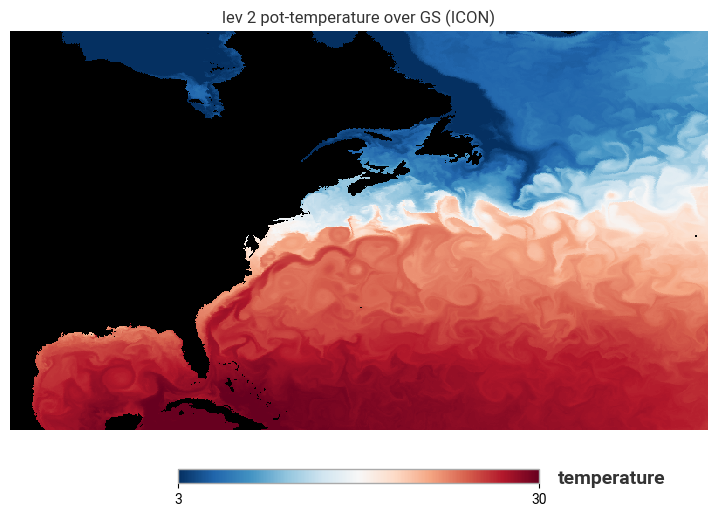

In [ ]:

interpolated_data = hp.cartview(dnp,
            flip="geo", 
            nest=True, 
            rot=[0,0,],
            unit='temperature',
            lonra=[-100,-30],
            latra=[20, 60],
            title='lev 2 pot-temperature over GS (ICON)',
            min=3,
            max=30,
            # notext=True
            cmap =cm.RdBu_r,
            badcolor='black',
            return_projected_map=True
           )
hp.graticule(dpar=10, dmer=10)


In [9]:
request = {
        "class": "d1",
        "dataset": "climate-dt",
        "activity": "scenariomip",
        "experiment": "ssp3-7.0",
        "realization": "1",
        "generation" : "1",
        "model": "ifs-nemo",
        "resolution": "high",
        "expver": "0001",
        "stream": "clte",
        "date": "20251129",
        "time": "0000",
        "type": "fc",
        "levelist" : "2",
        "levtype": "o3d",
        "param": "263501"
    }

file2 = client.retrieve("destination-earth", request, "data/climate-dt-healpix-ocean-example2.grib") 


2025-06-17 18:22:20 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20251129'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            "generation: '1'\n"
            "levelist: '2'\n"
            'levtype: o3d\n'
            'model: ifs-nemo\n'
            "param: '263501'\n"
            "realization: '1'\n"
            'resolution: high\n'
            'stream: clte\n'
            "time: '0000'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2025-06-17 18:22:20 - INFO - Request accepted. Please poll ./48ccbf97-3b08-458e-8da9-dae4b6072052 for status
2025-06-17 18:22:20 - INFO - Checking request status (48ccbf97-3b08-458e-8da9-dae4b6072052)...
2025-06-17 18:22:21 - INFO - The current status of the request is 'queued'
2025-06-17 18:22:22 - INFO - The current status of the request is 'processing'
2025-06-17 18:22:25 - INFO - The current status of the request is '

In [5]:
data2 = earthkit.data.from_source("file", "data/climate-dt-healpix-ocean-example2.grib")

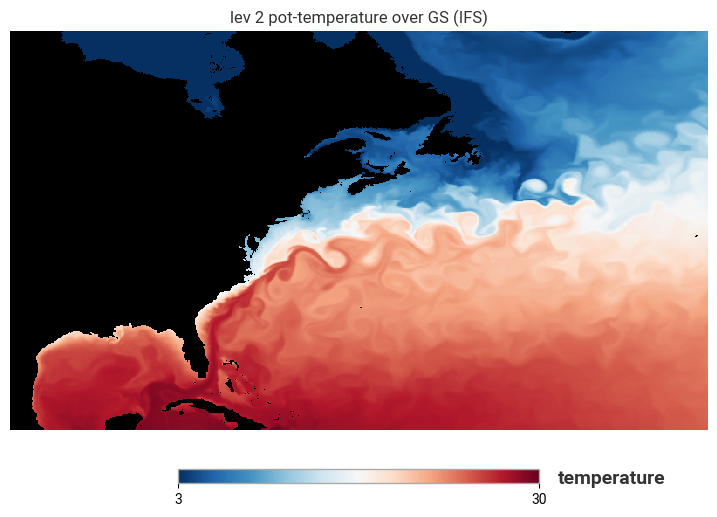

In [ ]:
dnp2=data2[0].values-273

interpolated_data = hp.cartview(dnp2,
            flip="geo", 
            nest=True, 
            rot=[0,0,],
            unit='temperature',
            lonra=[-100,-30],
            latra=[20, 60],
            title='lev 2 pot-temperature over GS (IFS)',
            min=3,
            max=30,
            # notext=True
            cmap =cm.RdBu_r,
            badcolor='black',
            return_projected_map=True
           )
hp.graticule(dpar=10, dmer=10)